***Getting started with Colab in my Simplilearn DL class***

Import Tensorflow and check it's version

In [1]:
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.18.0


**Load the MNIST dataset**


The MNIST dataset is a large collection of handwritten digits commonly used for training and testing in the field of machine learning. It is one of the most well-known datasets for evaluating the performance of image processing and pattern recognition algorithms.

![alt text](https://i.imgur.com/Su00XUA.png)

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("Exploring the number of training data samples")
print(x_train.shape)


Exploring the number of training data samples
(60000, 28, 28)


In [4]:
print(type(x_train))

<class 'numpy.ndarray'>


In [5]:
print(y_train.shape)

(60000,)


In [6]:
print(y_train)

[5 0 4 ... 5 6 8]


In [14]:
print(y_train)

0


In [15]:
print(max(y_train))

9


In [24]:
print(set(y_train.tolist()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [22]:
print(set(y_train))

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


In [17]:
print("Exploring the number of testing data samples")

Exploring the number of testing data samples


In [19]:
print(x_test.shape)

(10000, 28, 28)


In [20]:
print(y_test.shape)

(10000,)


In [25]:
print(x_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In order to normalise our train and test datasets, we divide the pixel values present in every image by 255.

In [26]:
x_train = x_train/255.0
x_test = x_test/255.0

In [27]:
print("After data normalisation")
print(x_test[0])

After data normalisation
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.      

One hot encoding the labels

In [28]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train,10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test,10)

In [29]:
print("Before OHE")
print(y_train[0])

Before OHE
5


In [30]:
print("After OHE")
print(y_train_one_hot[0])

After OHE
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [32]:
print(x_train.shape)

(60000, 28, 28)


In [33]:
print(x_test.shape)

(10000, 28, 28)


In [34]:
# X_train is 60000 rows of 28x28 values(2d); we reshape it to 60000 x 784(1d)
# X_test is 10000 rows od data 28x28 values(2d); we reshape it to 10000 x 784(1d)
# 28x28 = 784 neurons
x_train_reshaped = x_train.reshape(60000,784)
x_test_reshaped = x_test.reshape(10000,784)

Note: We have hence loaded the data and completed all the necessary preprocessing steps.

***Let us begin creating our first Neural Network Model***

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model_mnist_digits = Sequential()

In [37]:
model_mnist_digits.add(Dense(10, input_shape=(784,), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model_mnist_digits.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#compile the model
model_mnist_digits.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# Training the model

training = model_mnist_digits.fit(x_train_reshaped,y_train_one_hot,epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6821 - loss: 1.2311 - val_accuracy: 0.8790 - val_loss: 0.5088
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8708 - loss: 0.5170 - val_accuracy: 0.8918 - val_loss: 0.4175
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8852 - loss: 0.4384 - val_accuracy: 0.8988 - val_loss: 0.3812
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8910 - loss: 0.4052 - val_accuracy: 0.9030 - val_loss: 0.3607
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8952 - loss: 0.3797 - val_accuracy: 0.9053 - val_loss: 0.3486


In [46]:
#evaluate the model
test_loss, test_acc = model_mnist_digits.evaluate(x_test_reshaped, y_test_one_hot)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8923 - loss: 0.3991
Test accuracy: 0.9067999720573425


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


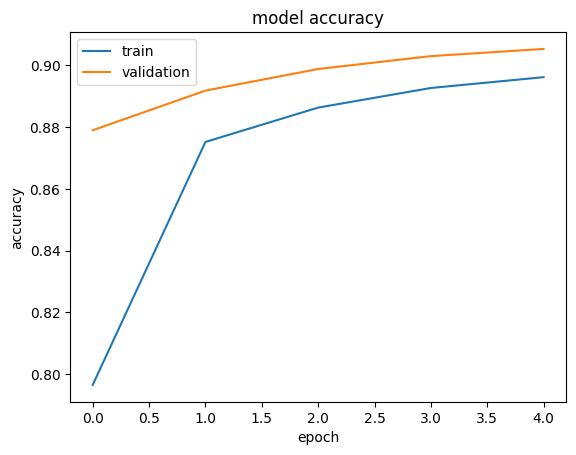

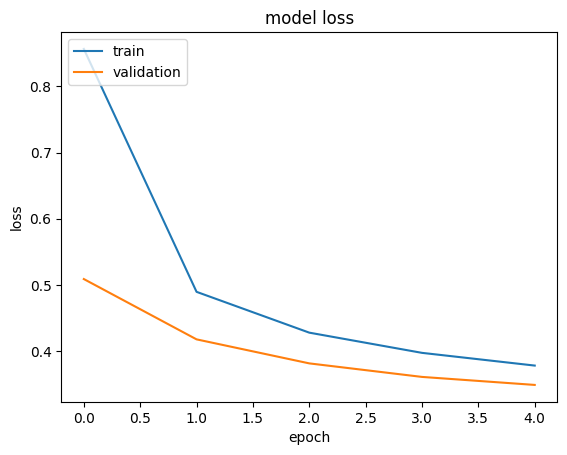

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy']) # training accuracy values
plt.plot(training.history['val_accuracy']) #validation accuracy values
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss']) # training loss values
plt.plot(training.history['val_loss']) #validation loss values
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [45]:
#evaluate the model
test_loss, test_acc = model_mnist_digits.evaluate(x_test_reshaped, y_test_one_hot)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8923 - loss: 0.3991
Test accuracy: 0.9067999720573425


Build another model with 1 hidden layer. This model would have 3 layers in total - input, hidden & output layers

In [47]:
model_mnist_digits_hidden = Sequential()

In [48]:
model_mnist_digits_hidden.add(Dense(20, activation = "relu", input_shape=(784,))) #input layer with hidden layer
model_mnist_digits_hidden.add(Dense(10, activation = "softmax")) #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model_mnist_digits_hidden.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model_mnist_digits_hidden.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
training2 = model_mnist_digits_hidden.fit(x_train_reshaped,y_train_one_hot,epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6389 - loss: 1.2919 - val_accuracy: 0.8871 - val_loss: 0.4311
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8816 - loss: 0.4263 - val_accuracy: 0.9085 - val_loss: 0.3331
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9015 - loss: 0.3490 - val_accuracy: 0.9169 - val_loss: 0.2963
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9159 - loss: 0.3023 - val_accuracy: 0.9237 - val_loss: 0.2756
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9191 - loss: 0.2885 - val_accuracy: 0.9264 - val_loss: 0.2597


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


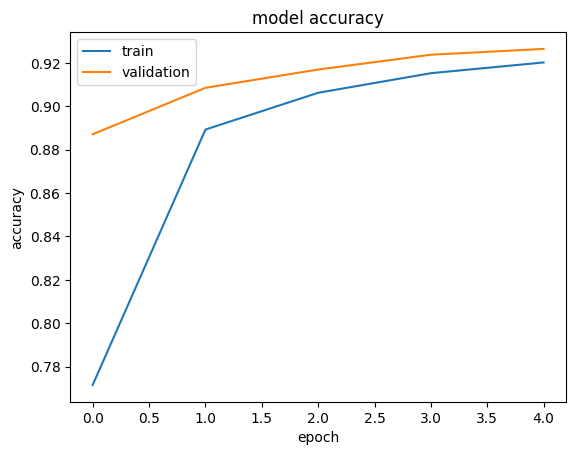

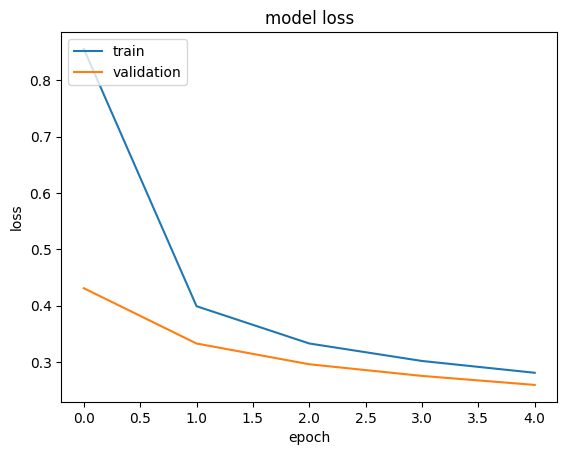

In [52]:
# list all data in training
print(training2.history.keys())
# summarize training for accuracy
plt.plot(training2.history['accuracy']) # training accuracy values
plt.plot(training2.history['val_accuracy']) #validation accuracy values
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training2.history['loss']) # training loss values
plt.plot(training2.history['val_loss']) #validation loss values
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()